In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from statannotations.Annotator import Annotator #!pip install seaborn statannotations 
import pickle

In [45]:
pcons_res=pd.read_csv('data_plots/pconsc_data.csv')
esm_res=pd.read_csv('data_plots/esm_data.csv')
alpha_res=pd.read_csv('data_plots/alpha_data.csv')
random_res=pd.read_csv('data_plots/random_data.csv')
rand_mol_res=pd.read_csv('data_plots/random_mol_data.csv')
pcons_res_mol=pd.read_csv('data_plots/original_mol_data.csv')
vertical_stack1 = pd.concat([pcons_res, esm_res,alpha_res,random_res], axis=0)
df_melted1 = pd.melt(vertical_stack1, id_vars=["cmap"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

rand_mol_res=pd.read_csv('data_plots/random_mol_data.csv')
pcons_res_mol=pd.read_csv('data_plots/original_mol_data.csv')
rand_mol_res.columns = rand_mol_res.columns.str.replace('cmap', 'Encoding')
rand_mol_res.Encoding[rand_mol_res.Encoding == 'Random Ligand Graph'] = 'Random' 
pcons_res_mol.columns = pcons_res_mol.columns.str.replace('cmap', 'Encoding')
pcons_res_mol.Encoding[pcons_res_mol.Encoding == 'Original Ligand Graph'] = 'Original' 


point_rand_mol=pd.read_csv('data_plots/congeneric_kiba_data.csv')
point_rand_mol.columns = point_rand_mol.columns.str.replace('cmap', 'Encoding')
point_rand_mol.Encoding[point_rand_mol.Encoding == 'Point Randomized'] = 'Point Random'
point_rand_nod_mol=pd.read_csv('data_plots/Random_node_data_kiba.csv')
point_rand_nod_mol.columns = point_rand_nod_mol.columns.str.replace('cmap', 'Encoding')
point_rand_nod_mol.Encoding[point_rand_nod_mol.Encoding == 'Random Node Ligand Graph'] = 'Random Node'

vertical_stack2 = pd.concat([pcons_res_mol, rand_mol_res,point_rand_mol,point_rand_nod_mol], axis=0)
df_melted2 = pd.melt(vertical_stack2, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])


concat_res=pd.read_csv('data_plots/pconsc_data.csv')
concat_res.columns = concat_res.columns.str.replace('cmap', 'Encoding')
concat_res.Encoding[concat_res.Encoding == 'Pconsc4'] = 'Concat'

prod_res=pd.read_csv('data_plots/kiba_product_data.csv')
prod_res.columns = prod_res.columns.str.replace('cmap', 'Encoding')
prod_res.Encoding[prod_res.Encoding == 'Point Randomization Ligand Graph'] = 'Product'

prod_con_res=pd.read_csv('data_plots/kiba_prod_concat_data.csv')
prod_con_res.columns =prod_con_res.columns.str.replace('cmap', 'Encoding')
prod_con_res.Encoding[prod_con_res.Encoding == 'Point Randomization Ligand Graph'] = 'Concat+Product'

vertical_stack6 = pd.concat([concat_res,prod_res, prod_con_res], axis=0)
df_melted6 = pd.melt(vertical_stack6, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])



/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_78923/1545369354.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rand_mol_res.Encoding[rand_mol_res.Encoding == 'Random Ligand Graph'] = 'Random'
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_78923/1545369354.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcons_res_mol.Encoding[pcons_res_mol.Encoding == 'Original Ligand Graph'] = 'Original'
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_78923/1545369354.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [39]:
pcons_res=pd.read_csv('davis_figures_data/pconsc4_original_davis_data.csv')
rand_mol_res=pd.read_csv('davis_figures_data1/pconcs4_random_davis_data.csv')
pcons_res_mol=pd.read_csv('davis_figures_data/pconcs4_original_ligand_davis_data.csv')
rand_mol_res.columns = rand_mol_res.columns.str.replace('cmap', 'Encoding')
rand_mol_res.Encoding[rand_mol_res.Encoding == 'Random Ligand Graph'] = 'Random' 
pcons_res_mol.columns = pcons_res_mol.columns.str.replace('cmap', 'Encoding')
pcons_res_mol.Encoding[pcons_res_mol.Encoding == 'Original Ligand Graph'] = 'Original'
point_rand_mol=pd.read_csv('davis_figures_data1/pconcs4_congeneric_ligand_davis_data.csv')
point_rand_mol.columns = point_rand_mol.columns.str.replace('cmap', 'Encoding')
point_rand_mol.Encoding[point_rand_mol.Encoding == 'Point Randomization Ligand Graph'] = 'Point Random'
point_rand_nod_mol=pd.read_csv('davis_figures_data1/ligand_davis_random_node_data.csv')
point_rand_nod_mol.Encoding[point_rand_nod_mol.Encoding == 'Random Node Ligand Graph'] = 'Random Node'
vertical_stack4 = pd.concat([pcons_res_mol, rand_mol_res,point_rand_mol,point_rand_nod_mol], axis=0)
df_melted4 = pd.melt(vertical_stack4, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])
concat_res=pd.read_csv('davis_figures_data1/pconcs4_original_concat_davis_data.csv')
prod_res=pd.read_csv('davis_figures_data1/pconcs4_original_product_davis_data.csv')
prod_con_res=pd.read_csv('davis_figures_data1/pconcs4_original_ligand_prod+conc_davis_data.csv')
vertical_stack5 = pd.concat([concat_res,prod_res, prod_con_res], axis=0)
df_melted5 = pd.melt(vertical_stack5, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_78923/1929268737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rand_mol_res.Encoding[rand_mol_res.Encoding == 'Random Ligand Graph'] = 'Random'
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_78923/1929268737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcons_res_mol.Encoding[pcons_res_mol.Encoding == 'Original Ligand Graph'] = 'Original'
/var/folders/3h/x516l3bx56lc9gv2vh327x6w0000gn/T/ipykernel_78923/1929268737.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [40]:
# pcons_res1=pcons_res.copy(deep=True)
# esm_res1=esm_res.copy(deep=True)
# pcons_res1.columns = pcons_res1.columns.str.replace('cmap', 'Encoding')
# esm_res1.columns = esm_res1.columns.str.replace('cmap', 'Encoding')
# vertical_stack6 = pd.concat([pcons_res1, esm_res1], axis=0)
# df_melted6 = pd.melt(vertical_stack6, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])
point_rand_mol=pd.read_csv('davis_figures_data1/pconcs4_congeneric_ligand_davis_data.csv')
point_rand_mol.columns = point_rand_mol.columns.str.replace('cmap', 'Encoding')
pcons_res2=pd.read_csv('davis_figures_data/pconsc4_original_davis_data.csv')
esm_res2=pd.read_csv('davis_figures_data/esm_original_davis_data.csv')
alpha_res2=pd.read_csv('davis_figures_data/alphafold_original_davis_data.csv')
random_res2=pd.read_csv('davis_figures_data/rand_original_davis_data.csv')

vertical_stack7 = pd.concat([pcons_res2, esm_res2,alpha_res2,random_res2], axis=0)
df_melted7 = pd.melt(vertical_stack7, id_vars=["cmap"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

In [53]:
print(np.mean(pcons_res2['CI']),np.std(pcons_res2['CI']))
print(np.mean(pcons_res2['Pearson']), np.std(pcons_res2['Pearson']))
print(np.mean(pcons_res2['Spearman']), np.std(pcons_res2['Spearman']))
print(np.mean(pcons_res2['RMSE']), np.std(pcons_res2['RMSE']))

0.8864400096481486 0.010377699503080057
0.824471227606591 0.01261430960002958
0.6864690593298512 0.012565089997315908
0.47656830103576786 0.022953610109112153


In [50]:
print(np.mean(esm_res2['CI']),np.std(esm_res2['CI']))
print(np.mean(esm_res2['Pearson']), np.std(esm_res2['Pearson']))
print(np.mean(esm_res2['Spearman']), np.std(esm_res2['Spearman']))
print(np.mean(esm_res2['RMSE']), np.std(esm_res2['RMSE']))

0.8863252429529667 0.008527129425502938
0.8225191410994157 0.012797579870350842
0.6809290638566757 0.012253954386655875
0.4734103473781043 0.01823216437837686


In [51]:
print(np.mean(alpha_res2['CI']),np.std(alpha_res2['CI']))
print(np.mean(alpha_res2['Pearson']), np.std(alpha_res2['Pearson']))
print(np.mean(alpha_res2['Spearman']), np.std(alpha_res2['Spearman']))
print(np.mean(alpha_res2['RMSE']), np.std(alpha_res2['RMSE']))

0.882918707731141 0.00932629619975516
0.8168496186943093 0.01624084998999047
0.6797472374271041 0.013844334860268892
0.4880858127239609 0.019711550993277815


In [52]:
print(np.mean(random_res2['CI']),np.std(random_res2['CI']))
print(np.mean(random_res2['Pearson']), np.std(random_res2['Pearson']))
print(np.mean(random_res2['Spearman']), np.std(random_res2['Spearman']))
print(np.mean(random_res2['RMSE']), np.std(random_res2['RMSE']))

0.8607944927090049 0.0074243650075595784
0.7898878292675278 0.016602250956440766
0.6350180415086089 0.01652392555570234
0.5132656534218683 0.018992845838206287


In [61]:
print(np.mean(esm_davis['CI']),np.std(esm_davis['CI']))
print(np.mean(esm_davis['Pearson']), np.std(esm_davis['Pearson']))
print(np.mean(esm_davis['Spearman']), np.std(esm_davis['Spearman']))
print(np.mean(esm_davis['RMSE']), np.std(esm_davis['RMSE']))

0.8812677868192104 0.00842235499788315
0.8100209118364521 0.014541476811006733
0.6740987966295116 0.014408118029891717
0.49364573504172105 0.021170437970230813


In [62]:
print(np.mean(klifs_davis['CI']),np.std(klifs_davis['CI']))
print(np.mean(klifs_davis['Pearson']), np.std(klifs_davis['Pearson']))
print(np.mean(klifs_davis['Spearman']), np.std(klifs_davis['Spearman']))
print(np.mean(klifs_davis['RMSE']), np.std(klifs_davis['RMSE']))

0.8711976633975436 0.009711065873372752
0.8062042926675144 0.017357213530074155
0.6518283434755594 0.01701141264715721
0.494954762069684 0.02049570150426655


In [54]:
print(np.mean(pcons_res['CI']),np.std(pcons_res['CI']))
print(np.mean(pcons_res['Pearson']), np.std(pcons_res['Pearson']))
print(np.mean(pcons_res['Spearman']), np.std(pcons_res['Spearman']))
print(np.mean(pcons_res['RMSE']), np.std(pcons_res['RMSE']))

0.8498653728507699 0.009507477435689034
0.8149983711213142 0.019142887201291255
0.8150236034424843 0.013317644002721112
0.47215455106483784 0.01987460583233902


In [55]:
print(np.mean(esm_res['CI']),np.std(esm_res['CI']))
print(np.mean(esm_res['Pearson']), np.std(esm_res['Pearson']))
print(np.mean(esm_res['Spearman']), np.std(esm_res['Spearman']))
print(np.mean(esm_res['RMSE']), np.std(esm_res['RMSE']))

0.8520082051147646 0.009528734767540304
0.8175942588463393 0.016761754851660027
0.8166311601991932 0.015421436992159785
0.4688017373457381 0.021569826836335244


In [56]:
print(np.mean(alpha_res['CI']),np.std(alpha_res['CI']))
print(np.mean(alpha_res['Pearson']), np.std(alpha_res['Pearson']))
print(np.mean(alpha_res['Spearman']), np.std(alpha_res['Spearman']))
print(np.mean(alpha_res['RMSE']), np.std(alpha_res['RMSE']))

0.846933823009989 0.009232275992034642
0.8133904997917039 0.01711021085729764
0.8115757297579623 0.013849426999174455
0.47477445503933724 0.027590930048182073


In [57]:
print(np.mean(random_res['CI']),np.std(random_res['CI']))
print(np.mean(random_res['Pearson']), np.std(random_res['Pearson']))
print(np.mean(random_res['Spearman']), np.std(random_res['Spearman']))
print(np.mean(random_res['RMSE']), np.std(random_res['RMSE']))

0.8460226545064794 0.00862431375410841
0.8086122939180921 0.01860189405334086
0.8088909015440928 0.014600831132393206
0.48305427745676566 0.02625124163352214


In [59]:
print(np.mean(esm_kiba['CI']),np.std(esm_kiba['CI']))
print(np.mean(esm_kiba['Pearson']), np.std(esm_kiba['Pearson']))
print(np.mean(esm_kiba['Spearman']), np.std(esm_kiba['Spearman']))
print(np.mean(esm_kiba['RMSE']), np.std(esm_kiba['RMSE']))

0.84587095790191 0.009270088437827156
0.8133988303874304 0.01902413174721282
0.810061458510468 0.013030113576689126
0.4800504360931656 0.02360717899644407


In [60]:
print(np.mean(klifs_kiba['CI']),np.std(klifs_kiba['CI']))
print(np.mean(klifs_kiba['Pearson']), np.std(klifs_kiba['Pearson']))
print(np.mean(klifs_kiba['Spearman']), np.std(klifs_kiba['Spearman']))
print(np.mean(klifs_kiba['RMSE']), np.std(klifs_kiba['RMSE']))

0.8106993457747034 0.009277017679623833
0.7658100661860481 0.01972756915263246
0.7547004371967957 0.014595584973677
0.5275465617795762 0.021539461606695297


In [38]:
print(np.mean(prod_res['CI']),np.std(prod_res['CI']))
print(np.mean(prod_res['Pearson']), np.std(prod_con_res['Pearson']))
print(np.mean(prod_res['Spearman']), np.std(prod_res['Spearman']))
print(np.mean(prod_res['RMSE']), np.std(prod_res['RMSE']))

0.8499049994987866 0.008816890172486528
0.8128303570211024 0.020007274887840976
0.8172087134146755 0.012396759547725867
0.4760728978099632 0.02617400663248107


In [41]:
print(np.mean(prod_con_res['CI']),np.std(prod_con_res['CI']))
print(np.mean(prod_con_res['Pearson']), np.std(prod_con_res['Pearson']))
print(np.mean(prod_con_res['Spearman']), np.std(prod_con_res['Spearman']))
print(np.mean(prod_con_res['RMSE']), np.std(prod_con_res['RMSE']))

0.8853608913610056 0.009451701277229895
0.8211640200423395 0.014052899884259316
0.6889097467203297 0.016034450893579903
0.48342427075345507 0.016229450382179433


In [42]:
print(np.mean(prod_res['CI']),np.std(prod_res['CI']))
print(np.mean(prod_res['Pearson']), np.std(prod_con_res['Pearson']))
print(np.mean(prod_res['Spearman']), np.std(prod_res['Spearman']))
print(np.mean(prod_res['RMSE']), np.std(prod_res['RMSE']))

0.8781181633066062 0.009196630136649253
0.8119919481123461 0.014052899884259316
0.6677448842859872 0.013695082673425594
0.4923937728340418 0.018913094417523563


In [46]:
print(np.mean(pcons_res['CI']),np.std(pcons_res['CI']))
print(np.mean(pcons_res['Pearson']), np.std(pcons_res['Pearson']))
print(np.mean(pcons_res['Spearman']), np.std(pcons_res['Spearman']))
print(np.mean(pcons_res['RMSE']), np.std(pcons_res['RMSE']))

0.8498653728507699 0.009507477435689034
0.8149983711213142 0.019142887201291255
0.8150236034424843 0.013317644002721112
0.47215455106483784 0.01987460583233902


In [24]:
print(np.mean(pcons_res2['CI']),np.std(pcons_res2['CI']))
print(np.mean(pcons_res2['Pearson']), np.std(pcons_res2['Pearson']))
print(np.mean(pcons_res2['Spearman']), np.std(pcons_res2['Spearman']))
print(np.mean(pcons_res2['RMSE']), np.std(pcons_res2['RMSE']))

0.8864400096481486 0.010377699503080057
0.824471227606591 0.01261430960002958
0.6864690593298512 0.012565089997315908
0.47656830103576786 0.022953610109112153


In [25]:
print(np.mean(point_rand_nod_mol['CI']),np.std(point_rand_nod_mol['CI']))
print(np.mean(point_rand_nod_mol['Pearson']), np.std(point_rand_nod_mol['Pearson']))
print(np.mean(point_rand_nod_mol['Spearman']), np.std(point_rand_nod_mol['Spearman']))
print(np.mean(point_rand_nod_mol['RMSE']), np.std(point_rand_nod_mol['RMSE']))

0.5750529111476389 0.011700274666510028
0.17992869069117123 0.029861759231152356
0.14111185886949454 0.020926985372916287
0.9229465798818769 0.02984839444476973


In [26]:
print(np.mean(rand_mol_res['CI']),np.std(rand_mol_res['CI']))
print(np.mean(rand_mol_res['Pearson']), np.std(rand_mol_res['Pearson']))
print(np.mean(rand_mol_res['Spearman']), np.std(rand_mol_res['Spearman']))
print(np.mean(rand_mol_res['RMSE']), np.std(rand_mol_res['RMSE']))

0.5668238724331343 0.011677109342350252
0.16673435505376433 0.026702912638315927
0.12509987970269598 0.018285858394742917
0.9601917477797854 0.024229307894758523


In [36]:
import numpy as np
metric='Spearman'
# mean and std of pcons_res2
pcons_res2_mean = np.mean(pcons_res[metric])
pcons_res2_std = np.std(pcons_res[metric])

# calculate percentage change in mean metric values
point_rand_nod_mol_percent = ((np.mean(point_rand_nod_mol[metric]) - pcons_res2_mean) / pcons_res2_mean) * 100
rand_mol_res_percent = ((np.mean(rand_mol_res[metric]) - pcons_res2_mean) / pcons_res2_mean) * 100

# calculate percentage change in std of metric values
point_rand_nod_mol_std_percent = ((np.std(point_rand_nod_mol[metric]) - pcons_res2_std) / pcons_res2_std) * 100
rand_mol_res_std_percent = ((np.std(rand_mol_res[metric]) - pcons_res2_std) / pcons_res2_std) * 100

print(f'point_rand_nod_mol percent change: {point_rand_nod_mol_percent:.2f}%')
print(f'rand_mol_res percent change: {rand_mol_res_percent:.2f}%')
print(f'point_rand_nod_mol std percent change: {point_rand_nod_mol_std_percent:.2f}%')
print(f'rand_mol_res std percent change: {rand_mol_res_std_percent:.2f}%')


point_rand_nod_mol percent change: -37.03%
rand_mol_res percent change: -60.77%
point_rand_nod_mol std percent change: 142.77%
rand_mol_res std percent change: 47.15%


In [9]:
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='bold',fontsize=35,ha='center',va='bottom')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')
    
def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

Text(0.085, 0.5, 'Scores')

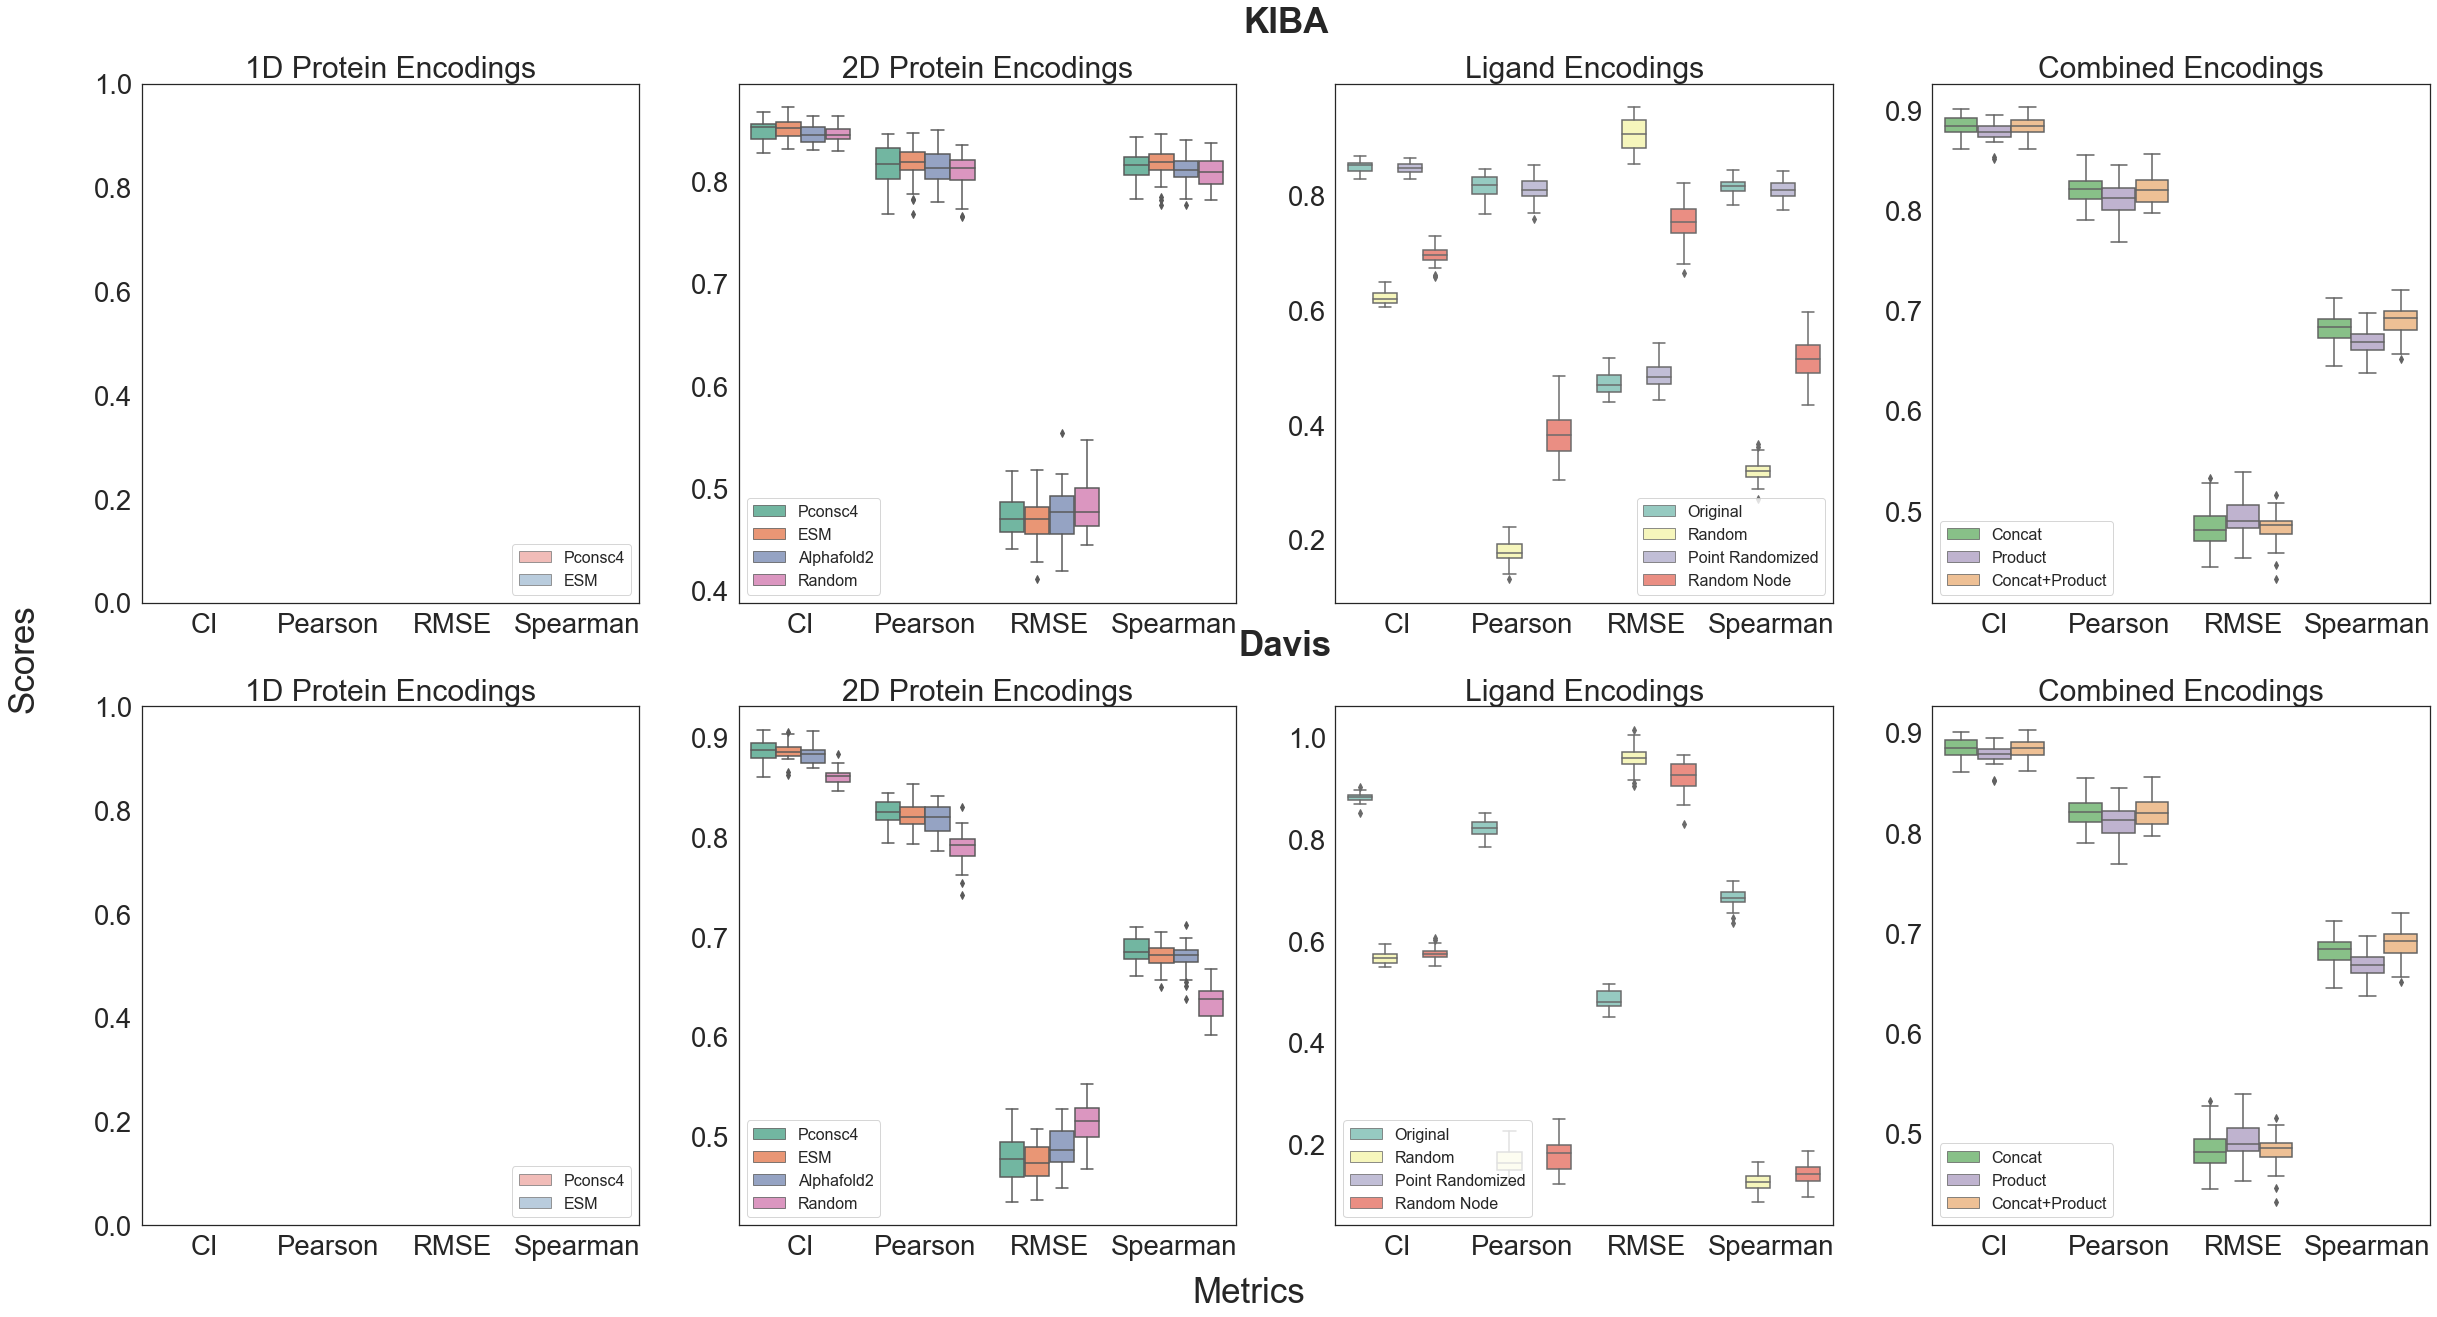

In [136]:
fig, axes = plt.subplots(2, 4, figsize=(41,21))
adjust_box_widths(fig, 1.2)
grid = plt.GridSpec(2, 4)
order = ["CI", "Pearson",'RMSE','Spearman']
#fig.suptitle('Initial')

### KIBA Data
create_subtitle(fig, grid[0, ::], 'KIBA')
hue_order1=['Pconsc4','ESM']
sns.boxplot(ax=axes[0][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[0][0].set_title("1D Protein Encodings")
# axes[0][0].set_xlabel('Metrics',fontsize=35)
# axes[0][0].set_ylabel('Scores',fontsize=35)
axes[0][0].set_xlabel('',fontsize=25)
axes[0][0].set_ylabel('',fontsize=25)
axes[0][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

hue_order2=['Pconsc4','ESM','Alphafold2','Random']
sns.boxplot(ax=axes[0][1],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order2)
axes[0][1].set_title("2D Protein Encodings")
axes[0][1].set_xlabel('',fontsize=25)
axes[0][1].set_ylabel('',fontsize=25)
axes[0][1].legend(loc='lower left',fontsize=16)

hue_order3=['Original','Random','Point Randomized', 'Random Node']
sns.boxplot(ax=axes[0][2],x='variable', y='value',hue='Encoding', data=df_melted2, order=order,palette="Set3",  hue_order=hue_order3)
axes[0][2].set_title("Ligand Encodings")
axes[0][2].set_xlabel('',fontsize=25)
axes[0][2].set_ylabel('',fontsize=25)
axes[0][2].legend(loc='lower right',fontsize=16)
hue_order4=['Concat','Product','Concat+Product']
sns.boxplot(ax=axes[0][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[0][3].set_title("Combined Encodings")
axes[0][3].set_xlabel('',fontsize=25)
axes[0][3].set_ylabel('',fontsize=25)
axes[0][3].legend(loc='lower left',fontsize=16)

# Davis Data
create_subtitle(fig, grid[1, ::], 'Davis')
sns.boxplot(ax=axes[1][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
axes[1][0].set_title("1D Protein Encodings")
axes[1][0].set_xlabel('',fontsize=25)
axes[1][0].set_ylabel('',fontsize=25)
axes[1][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

sns.boxplot(ax=axes[1][1],x='variable', y='value',hue='cmap', data=df_melted7, order=order,palette="Set2",  hue_order=hue_order2)
axes[1][1].set_title("2D Protein Encodings")
axes[1][1].set_xlabel('',fontsize=25)
axes[1][1].set_ylabel('',fontsize=25)
axes[1][1].legend(loc='lower left',fontsize=16)

#hue_order5=['Original Ligand Graph','Random Ligand Graph','Point Randomization Ligand Graph', 'Random Node Ligand Graph']
sns.boxplot(ax=axes[1][2],x='variable', y='value',hue='Encoding', data=df_melted4, order=order,palette="Set3",  hue_order=hue_order3)
axes[1][2].set_title("Ligand Encodings")
axes[1][2].set_xlabel('',fontsize=25)
axes[1][2].set_ylabel('',fontsize=25)
axes[1][2].legend(loc='lower left',fontsize=16)

sns.boxplot(ax=axes[1][3],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette="Accent",  hue_order=hue_order4)
axes[1][3].set_title("Combined Encodings")
axes[1][3].set_xlabel('',fontsize=25)
axes[1][3].set_ylabel('',fontsize=25)
axes[1][3].legend(loc='lower left',fontsize=16)
# fig.tight_layout(h_pad=1)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)

fig.supxlabel('Metrics',fontsize=35,y=0.08,ha='center',va='center')
fig.supylabel('Scores',fontsize=35,x=0.085,ha='center',va='center')

# fig.supxlabel('u Velocity (m/s)')
# fig.supylabel('y Distance (cm)')

# fig.savefig(os.path.join('results_plots',  'Fig4' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'Fig4' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_plots',  'Fig4' + '.svg'), dpi=500, bbox_inches='tight')



In [10]:
sns.set(font_scale = 2.5,style="white")

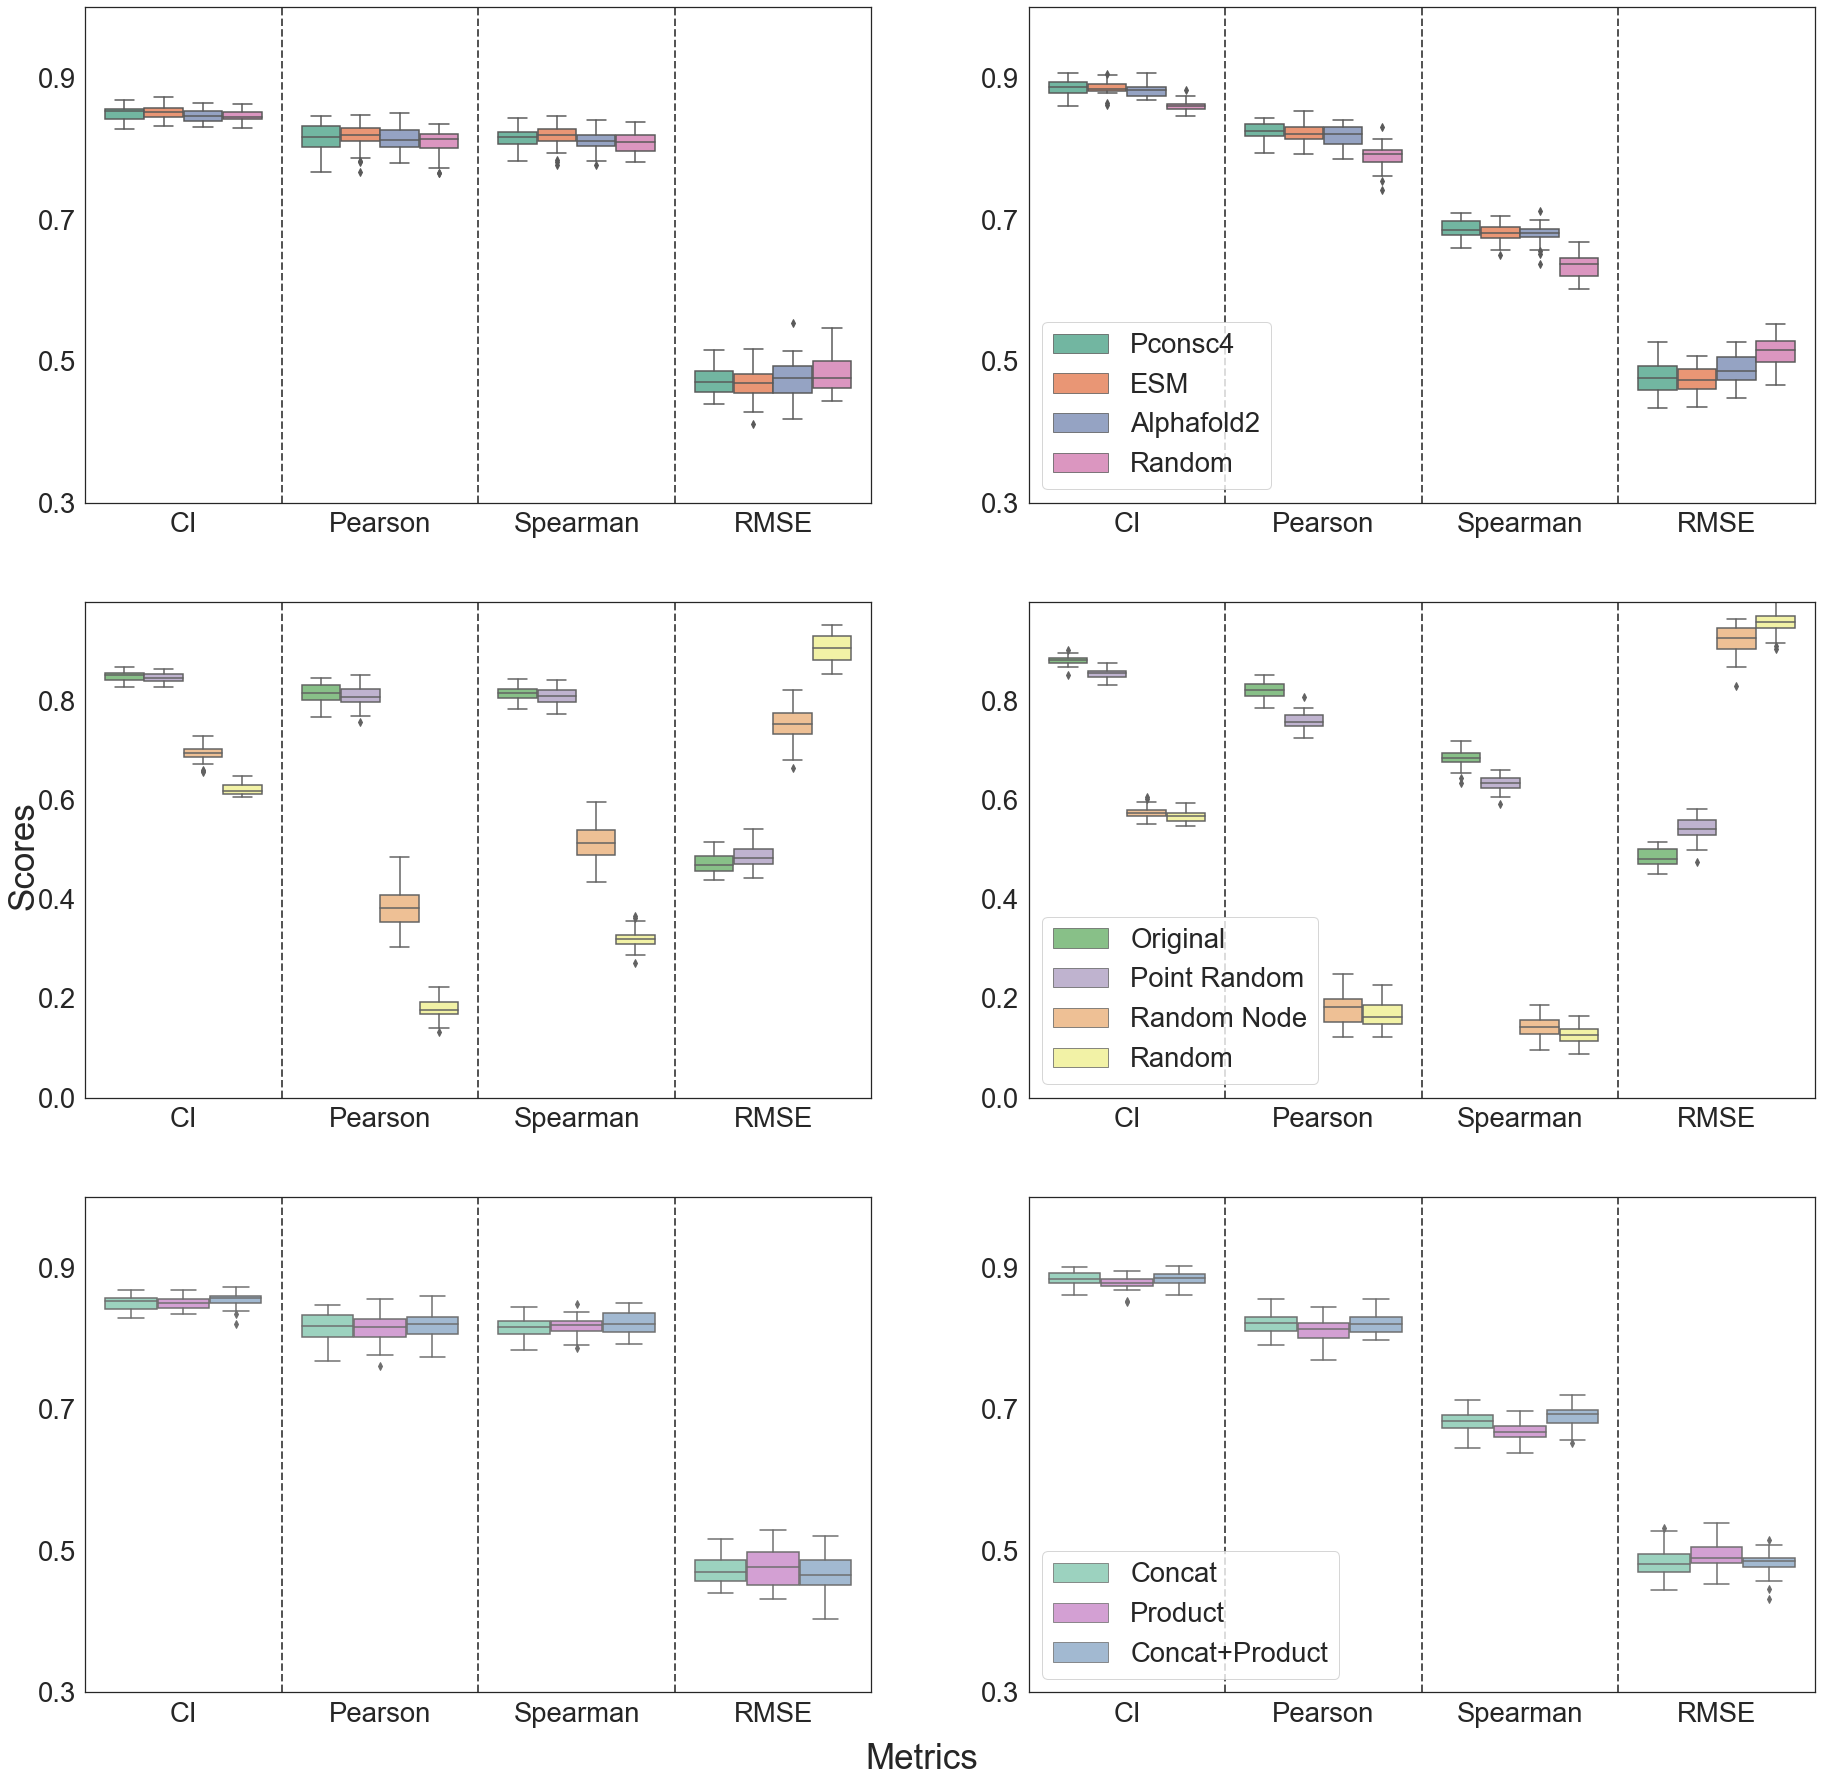

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(31,31))
adjust_box_widths(fig, 1.2)
#grid = plt.GridSpec(3, 2)
order = ["CI", "Pearson",'Spearman','RMSE',]
metric_order = ["CI", "Pearson",'Spearman','RMSE']
colors=['#93DBC2','#DB97DB','#9AB9D9']
#fig.suptitle('Initial')

### KIBA Data

# hue_order1=['Pconsc4','ESM']
# sns.boxplot(ax=axes[0][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette="Pastel1",  hue_order=hue_order1)
# axes[0][0].set_title("1D Protein Encodings")
# # axes[0][0].set_xlabel('Metrics',fontsize=35)
# # axes[0][0].set_ylabel('Scores',fontsize=35)
# axes[0][0].set_xlabel('',fontsize=25)
# axes[0][0].set_ylabel('',fontsize=25)
# axes[0][0].legend(loc='lower right',fontsize=16)
#axes[0].set_axis('equal')

hue_order1=['Pconsc4','ESM','Alphafold2','Random']
# axes[0][0].set_aspect('equal', adjustable='box')
sns.boxplot(ax=axes[0][0],x='variable', y='value',hue='cmap', data=df_melted1, order=order,palette="Set2",  hue_order=hue_order1)
# axes[0][0].set_title("2D Protein Encodings")
axes[0][0].set_xlabel('',fontsize=25)
axes[0][0].set_ylabel('',fontsize=25)
axes[0][0].set_ylim([0.3, 1])
axes[0][0].set_yticks(np.arange(0.3, 1, 0.2))
axes[0][0].legend([],[], frameon=False)

# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    axes[0][0].axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)
hue_order2=['Original','Point Random', 'Random Node','Random']
# axes[1][0].set_aspect('equal', adjustable='box')
sns.boxplot(ax=axes[1][0],x='variable', y='value',hue='Encoding', data=df_melted2, order=order,palette="Accent",  hue_order=hue_order2)
# axes[1][0].set_title("Ligand Encodings")
axes[1][0].set_xlabel('',fontsize=25)
axes[1][0].set_ylabel('',fontsize=25)
axes[1][0].set_ylim([0, 1])
axes[1][0].set_yticks(np.arange(0, 1, 0.2))
# axes[1][0].legend(loc='lower right',fontsize=16)
axes[1][0].legend([],[], frameon=False)
# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    axes[1][0].axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)

hue_order3=['Concat','Product','Concat+Product']
#axes[2][0].set_aspect('equal', adjustable='box')
sns.boxplot(ax=axes[2][0],x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette=colors,  hue_order=hue_order3)
# axes[2][0].set_title("Combined Encodings")
axes[2][0].set_xlabel('',fontsize=25)
axes[2][0].set_ylabel('',fontsize=25)
axes[2][0].set_ylim([0.3, 1])
axes[2][0].set_yticks(np.arange(0.3, 1, 0.2))
# axes[2][0].legend(loc='lower left',fontsize=16)
axes[2][0].legend([],[], frameon=False)
# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    axes[2][0].axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)
# Davis Data

#axes[0][1].set_aspect('equal', adjustable='box')
sns.boxplot(ax=axes[0][1],x='variable', y='value',hue='cmap', data=df_melted7, order=order,palette="Set2",  hue_order=hue_order1)
# axes[0][1].set_title("2D Protein Encodings")
axes[0][1].set_xlabel('',fontsize=25)
axes[0][1].set_ylabel('',fontsize=25)
axes[0][1].set_ylim([0.3, 1])
axes[0][1].set_yticks(np.arange(0.3, 1, 0.2))
axes[0][1].legend(loc='lower left')
#,bbox_to_anchor=(1.32, 0.5)
# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    axes[0][1].axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)
#hue_order5=['Original Ligand Graph','Random Ligand Graph','Point Randomization Ligand Graph', 'Random Node Ligand Graph']
#axes[1][1].set_aspect('equal', adjustable='box')
sns.boxplot(ax=axes[1][1],x='variable', y='value',hue='Encoding', data=df_melted4, order=order,palette="Accent",  hue_order=hue_order2)
axes[1][1].legend(loc='lower left')
#,bbox_to_anchor=(1.45, 0.5)
axes[1][1].set_xlabel('',fontsize=25)
axes[1][1].set_ylabel('',fontsize=25)
axes[1][1].set_ylim([0, 1])
axes[1][1].set_yticks(np.arange(0, 1, 0.2))
# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    axes[1][1].axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)
#axes[2][1].set_aspect('equal', adjustable='box')
sns.boxplot(ax=axes[2][1],x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette=colors,  hue_order=hue_order3)
# axes[2][1].set_title("Combined Encodings")
axes[2][1].set_xlabel('',fontsize=25)
axes[2][1].set_ylabel('',fontsize=25)
axes[2][1].set_ylim([0.3, 1])
axes[2][1].set_yticks(np.arange(0.3, 1, 0.2))
axes[2][1].legend(loc='lower left')
#,bbox_to_anchor=(1.4, 0.5)
# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    axes[2][1].axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)
# fig.tight_layout(h_pad=1)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)

fig.supxlabel('Metrics',fontsize=35,y=0.095,ha='center',va='center')
fig.supylabel('Scores',fontsize=35,x=0.0975,ha='center',va='center')



fig.savefig(os.path.join('results_plots',  'Fig4_draftv2' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'Fig4_draftv2' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'Fig4_draftv2' + '.svg'), dpi=500, bbox_inches='tight')



### 1D Encodings

In [47]:
esm_kiba=pd.read_csv('data_plots/1d_esm_kiba_data.csv')
esm_kiba.columns = esm_kiba.columns.str.replace('cmap', 'Encoding')
esm_davis=pd.read_csv('davis_figures_data1/1d_esm_davis_data.csv')
esm_davis.columns = esm_davis.columns.str.replace('cmap', 'Encoding')
klifs_kiba=pd.read_csv('data_plots/1d_klifs_kiba_data.csv')
klifs_kiba.columns = klifs_kiba.columns.str.replace('cmap', 'Encoding')
klifs_davis=pd.read_csv('davis_figures_data1/1d_klifs_davis_data.csv')
klifs_davis.columns =klifs_davis.columns.str.replace('cmap', 'Encoding')


vertical_stack8= pd.concat([esm_kiba, klifs_kiba], axis=0)
df_melted8 = pd.melt(vertical_stack8, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])

vertical_stack9= pd.concat([esm_davis, klifs_davis], axis=0)
df_melted9 = pd.melt(vertical_stack9, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])


In [48]:
print(np.mean(pcons_res['CI']),np.std(pcons_res['CI']))
print(np.mean(pcons_res['Pearson']), np.std(pcons_res['Pearson']))
print(np.mean(pcons_res['Spearman']), np.std(pcons_res['Spearman']))
print(np.mean(pcons_res['RMSE']), np.std(pcons_res['RMSE']))

0.8498653728507699 0.009507477435689034
0.8149983711213142 0.019142887201291255
0.8150236034424843 0.013317644002721112
0.47215455106483784 0.01987460583233902


In [49]:
print(np.mean(esm_kiba['CI']),np.std(esm_kiba['CI']))
print(np.mean(esm_kiba['Pearson']), np.std(esm_kiba['Pearson']))
print(np.mean(esm_kiba['Spearman']), np.std(esm_kiba['Spearman']))
print(np.mean(esm_kiba['RMSE']), np.std(esm_kiba['RMSE']))

0.84587095790191 0.009270088437827156
0.8133988303874304 0.01902413174721282
0.810061458510468 0.013030113576689126
0.4800504360931656 0.02360717899644407


In [58]:
print(np.mean(klifs_kiba['CI']),np.std(klifs_kiba['CI']))
print(np.mean(klifs_kiba['Pearson']), np.std(klifs_kiba['Pearson']))
print(np.mean(klifs_kiba['Spearman']), np.std(klifs_kiba['Spearman']))
print(np.mean(klifs_kiba['RMSE']), np.std(klifs_kiba['RMSE']))

0.8106993457747034 0.009277017679623833
0.7658100661860481 0.01972756915263246
0.7547004371967957 0.014595584973677
0.5275465617795762 0.021539461606695297


In [86]:
sns.set(font_scale = 2.5,style="white")

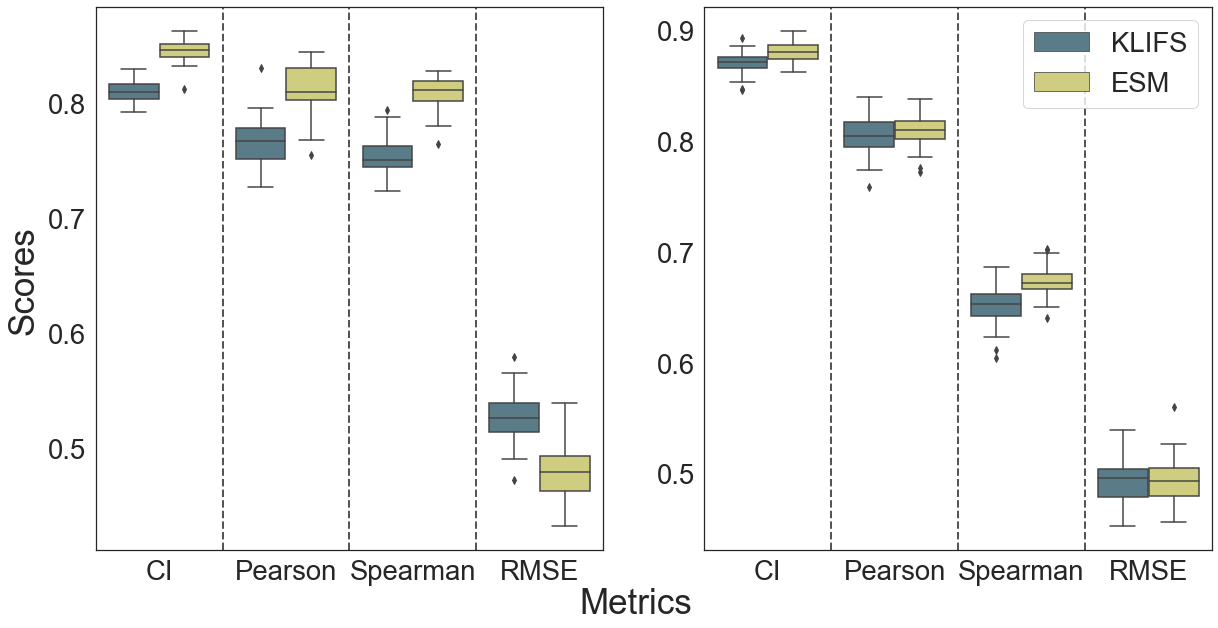

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
adjust_box_widths(fig, 1.4)
grid = plt.GridSpec(1, 2)
order = ["CI", "Pearson",'Spearman','RMSE',]
metric_order = ["CI", "Pearson",'Spearman','RMSE']
#fig.suptitle('Initial')
colors=['#537F8F','#DBDA73']
#'#386E8F'
### KIBA Data

hue_order1=['KLIFS','ESM']
# axes[0][0].set_aspect('equal', adjustable='box')
sns.boxplot(ax=axes[0],x='variable', y='value',hue='Encoding', data=df_melted8, order=order,palette=colors,  hue_order=hue_order1)
# axes[0][0].set_title("2D Protein Encodings")
axes[0].set_xlabel('',fontsize=25)
axes[0].set_ylabel('',fontsize=25)
axes[0].legend([],[], frameon=False)
# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    axes[0].axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)


# axes[1][0].set_aspect('equal', adjustable='box')
sns.boxplot(ax=axes[1],x='variable', y='value',hue='Encoding', data=df_melted9, order=order,palette=colors,  hue_order=hue_order1)
# axes[1][0].set_title("Ligand Encodings")
axes[1].set_xlabel('',fontsize=25)
axes[1].set_ylabel('',fontsize=25)
# axes[1][0].legend(loc='lower right',fontsize=16)
# axes[1].legend([],[], frameon=False)
axes[1].legend(loc='upper right')
# ,bbox_to_anchor=(1.4, 0.5)
# Draw a dotted line after each metric
for i in range(len(metric_order) - 1):
    axes[1].axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)


fig.supxlabel('Metrics',fontsize=35,y=0.05,ha='center',va='center')
fig.supylabel('Scores',fontsize=35,x=0.075,ha='center',va='center')



fig.savefig(os.path.join('results_plots',  'Fig5_draftv1' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'Fig5_draftv1' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results_plots',  'Fig5_draftv1' + '.svg'), dpi=500, bbox_inches='tight')

